# Part 1 - Shapely and geometric objects

In this lesson, you will learn how to create and manipulate geometries in Python using the [Shapely Python Package (documentation)](https://shapely.readthedocs.io/en/stable/manual.html).




In [377]:
import shapely

from shapely.geometry import Point, LineString, LinearRing, Polygon


In [216]:
point = Point(2.2, 4.2)
line = LineString([point,  (7.2, 0.5), (9.3, 2.45)])
poly = Polygon([point, (7.2, 0.5), (9.3, 2.45)])

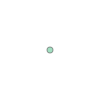

POINT (2.2 4.2)
<class 'shapely.geometry.point.Point'>
Point
2.2 4.2
(2.2, 4.2)


In [158]:
display(point)
print(point)
print(type(point))
print(point.geom_type)
print(point.x, point.y)
print(point.coords[0])

The point object is represented in a specific format based on
[GEOS](https://trac.osgeo.org/geos) C++ library that is one of the standard libraries behind various Geographic Information Systems. It runs under the hood e.g. in [QGIS](http://www.qgis.org/en/site/). 

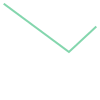

LINESTRING (2.2 4.2, 7.2 0.5, 9.300000000000001 2.45)
Length:  9.085874592215015
Area:  0.0
Centroid:  POINT (5.819693884412717 2.074019112996865)
Boundary:  MULTIPOINT (2.2 4.2, 9.300000000000001 2.45)
XY array: (array('d', [2.2, 7.2, 9.3]), array('d', [4.2, 0.5, 2.45]))


In [159]:
display(line)
print(line)
print("Length: ",  line.length)
print("Area: ",    line.area)
print("Centroid: ",line.centroid)
print("Boundary: ",line.boundary)
print("XY array:", line.xy)

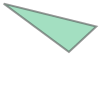

Polygon centroid:  POINT (6.233333333333333 2.383333333333333)
Polygon Area:  8.760000000000002
Polygon circumference:  16.398363908446527
Polygon Bounding Box:  (2.2, 0.5, 9.3, 4.2)
Polygon Exterior:  LINEARRING (2.2 4.2, 7.2 0.5, 9.300000000000001 2.45, 2.2 4.2)
Polygon Exterior Length:  16.398363908446527
Polygon Interior:  []


In [276]:
# Print the outputs
display(poly)
print("Polygon centroid: ", poly.centroid)
print("Polygon Area: ",  poly.area)
print("Polygon circumference: ",  poly.length)
print("Polygon Bounding Box: ", poly.bounds)
print("Polygon Exterior: ", poly.exterior)
print("Polygon Exterior Length: ", poly.exterior.length)
print("Polygon Interior: ", list(poly.interiors))

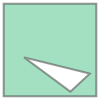

91.24

In [378]:
# Let's create the exterior of the polygon with holes
exterior = shapely.geometry.box(0,0,10,10).boundary

# Let's create a hole --> remember there can be multiple holes, thus we need to have a list of hole(s). 
# Here we have just one.
hole = [poly.boundary]

# Create the Polygon
poly_hole = Polygon(shell=exterior, holes=hole)

# Print object definition
display(poly_hole)
poly_hole.area

In [ ]:

# Import constructors for creating geometry collections
from shapely.geometry import MultiPoint, MultiLineString
from shapely.geometry import MultiPolygon, GeometryCollection


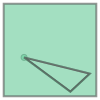

In [296]:
GeometryCollection([point,line,poly,poly_hole])

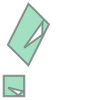

In [371]:
coll = GeometryCollection([
    poly_hole,
#     shapely.affinity.translate(poly_hole,7,2),
#     shapely.affinity.scale(poly_hole,0.5,0.5),
#     shapely.affinity.rotate(poly_hole, 45,'center'),
#     shapely.affinity.skew(poly_hole,30)
#     shapely.affinity.affine_transform(poly_hole,[1,0,0,1,12,15]),
#     shapely.affinity.affine_transform(poly_hole,[2,0,0,1.5,0,0]),
#     shapely.affinity.affine_transform(poly_hole,[1,1,0,1,0,0]),
    shapely.affinity.affine_transform(poly_hole,[1,-1,2,1,12,15]),
])
coll

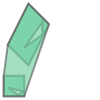

In [345]:
GeometryCollection([coll,
                    coll.convex_hull
                   ])

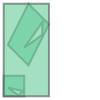

In [346]:
GeometryCollection([coll,
                    coll.envelope
                   ])

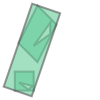

In [347]:
GeometryCollection([coll,
                    coll.minimum_rotated_rectangle
                   ])


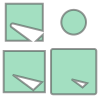

In [369]:
GeometryCollection([poly_hole,
                   shapely.affinity.translate(
                       poly_hole.buffer(0.5), # buffer +
                       12,0),
                   shapely.affinity.translate(
                       poly_hole.buffer(-0.5), # buffer -
                       0,12),
                    shapely.affinity.translate(
                        Point(5,5).buffer(3),
                        12,12)
                   ])

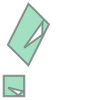

5.385164807134504
35.05709628591621


In [372]:
display(coll)
poly1,poly2 = tuple(coll)
print(poly1.distance(poly2))
print(poly1.hausdorff_distance(poly2))

## Spatial data model

![Spatial data model](img/SpatialDataModel.PNG)

*Fundamental geometric objects that can be used in Python with* [Shapely](https://shapely.readthedocs.io/en/stable/manual.html).

The most fundamental geometric objects are `Points`, `Lines` and `Polygons` which are the basic ingredients when working with spatial data in vector format. 
Python has a specific module called [Shapely](https://shapely.readthedocs.io/en/stable/manual.html) for doing various geometric operations. Basic knowledge of using Shapely is fundamental for understanding how geometries are stored and handled in GeoPandas.

**Geometric objects consist of coordinate tuples where:**

-  `Point` -object represents a single point in space. Points can be either two-dimensional (x, y) or three dimensional (x, y, z).
-  `LineString` -object (i.e. a line) represents a sequence of points joined together to form a line. Hence, a line consist of a list of at least two coordinate tuples
-  `Polygon` -object represents a filled area that consists of a list of at least three coordinate tuples that forms the outerior ring and a (possible) list of hole polygons.

**It is also possible to have a collection of geometric objects (e.g. Polygons with multiple parts):**

-  `MultiPoint` -object represents a collection of points and consists of a list of coordinate-tuples
-  `MultiLineString` -object represents a collection of lines and consists of a list of line-like sequences
-  `MultiPolygon` -object represents a collection of polygons that consists of a list of polygon-like sequences that construct from exterior ring and (possible) hole list tuples

**Useful attributes and methods in Shapely include:**

-  Creating lines and polygons based on a collection of point objects.
-  Calculating areas/length/bounds etc. of input geometries
-  Conducting geometric operations based on the input geometries such as `union`, `difference`, `distance` etc.
-  Conducting spatial queries between geometries such as `intersects`, `touches`, `crosses`, `within` etc.
